In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df

Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]

In [5]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [6]:
df.info

<bound method DataFrame.info of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [7]:
df.shape

(100, 4)

In [8]:
#Preprocess -> col0 useless
df=df.iloc[:,1:] #all rows,col from 1 to the end slicing in list


In [9]:
df

cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]

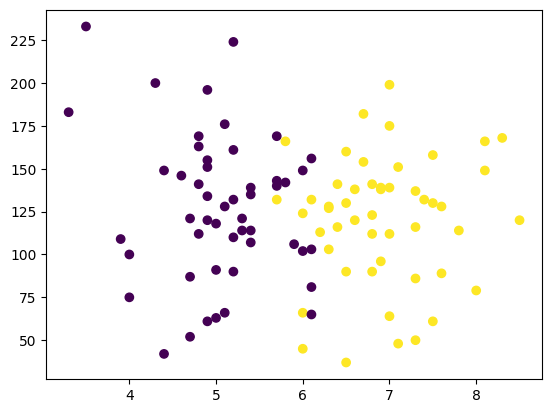

In [10]:
#EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X_train

cgpa     iq
15   5.1  176.0
4    5.8  142.0
44   7.5   61.0
42   7.6   89.0
63   6.3  128.0
..   ...    ...
95   4.3  200.0
94   4.7   52.0
5    7.1   48.0
36   5.7  140.0
46   5.3  114.0

[90 rows x 2 columns]

In [13]:
y_train

15    0
4     0
44    1
42    1
63    1
     ..
95    0
94    0
5     1
36    0
46    0
Name: placement, Length: 90, dtype: int64

In [14]:
X_test

cgpa     iq
17   3.3  183.0
9    5.1   66.0
55   7.8  114.0
90   7.3   86.0
69   8.5  120.0
49   5.4  135.0
26   7.0  199.0
68   4.0   75.0
76   4.9  155.0
12   5.4  139.0

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/home/rc/miniconda3/envs/richie/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


In [33]:
y_pred = model.predict(X_test)

/home/rc/miniconda3/envs/richie/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
y_test

17    0
9     0
55    1
90    1
69    1
49    0
26    1
68    0
76    0
12    0
Name: placement, dtype: int64

In [24]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

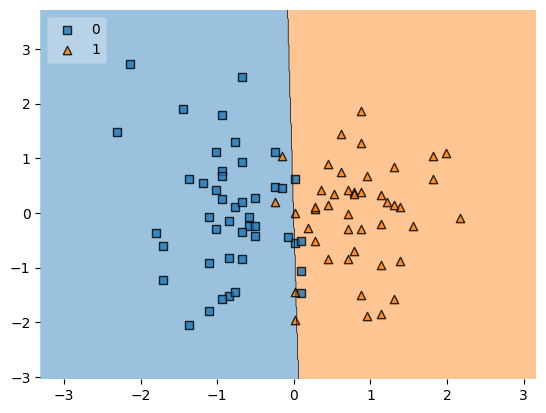

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle
     

pickle.dump(clf,open('model.pkl','wb'))
     


     
